# New Api

In [1]:

import scgenome

import logging

LOGGING_FORMAT = "%(asctime)s - %(levelname)s - %(message)s"
logging.basicConfig(format=LOGGING_FORMAT, level=logging.INFO)


In [2]:

hmmcopy = scgenome.pp.read_dlp_hmmcopy(
    '/juno/work/shah/isabl_data_lake/analyses/85/03/8503',
    '/juno/work/shah/isabl_data_lake/analyses/86/78/8678',
    '/juno/work/shah/isabl_data_lake/analyses/88/15/8815',
)


/juno/work/shah/users/mcphera1/repos/scgenome/venv/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


<AxesSubplot:>

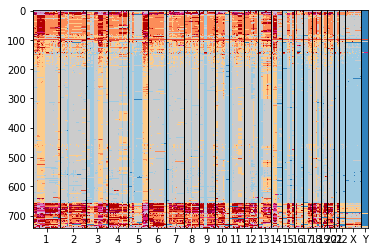

In [5]:

import numpy as np
import matplotlib.pyplot as plt

hmmcopy = scgenome.tl.sort_cells(hmmcopy, layer_name='copy')
scgenome.pl.plot_cell_cn_matrix(
    hmmcopy, layer_name='state', cell_order_fields=['cell_order'], raw=False)


In [7]:

hmmcopy = scgenome.pp.calculate_filter_metrics(hmmcopy)
hmmcopy = scgenome.pp.filter_cells(hmmcopy)


/juno/work/shah/users/mcphera1/repos/scgenome/venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/juno/work/shah/users/mcphera1/repos/scgenome/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [9]:

hmmcopy = scgenome.tl.cluster_cells_kmeans(hmmcopy, max_k=30)


2022-01-04 21:46:16,442 - INFO - trying with max k=30
2022-01-04 21:46:16,445 - INFO - trying with k=2
2022-01-04 21:46:16,767 - INFO - trying with k=3
2022-01-04 21:46:17,165 - INFO - trying with k=4
2022-01-04 21:46:17,618 - INFO - trying with k=5
2022-01-04 21:46:18,089 - INFO - trying with k=6
2022-01-04 21:46:18,685 - INFO - trying with k=7
2022-01-04 21:46:19,270 - INFO - trying with k=8
2022-01-04 21:46:19,909 - INFO - trying with k=9
2022-01-04 21:46:20,597 - INFO - trying with k=10
2022-01-04 21:46:21,337 - INFO - trying with k=11
2022-01-04 21:46:22,127 - INFO - trying with k=12
2022-01-04 21:46:23,023 - INFO - trying with k=13
2022-01-04 21:46:23,944 - INFO - trying with k=14
2022-01-04 21:46:24,940 - INFO - trying with k=15
2022-01-04 21:46:25,951 - INFO - trying with k=16
2022-01-04 21:46:27,002 - INFO - trying with k=17
2022-01-04 21:46:28,121 - INFO - trying with k=18
2022-01-04 21:46:29,316 - INFO - trying with k=19
2022-01-04 21:46:30,566 - INFO - trying with k=20
2022

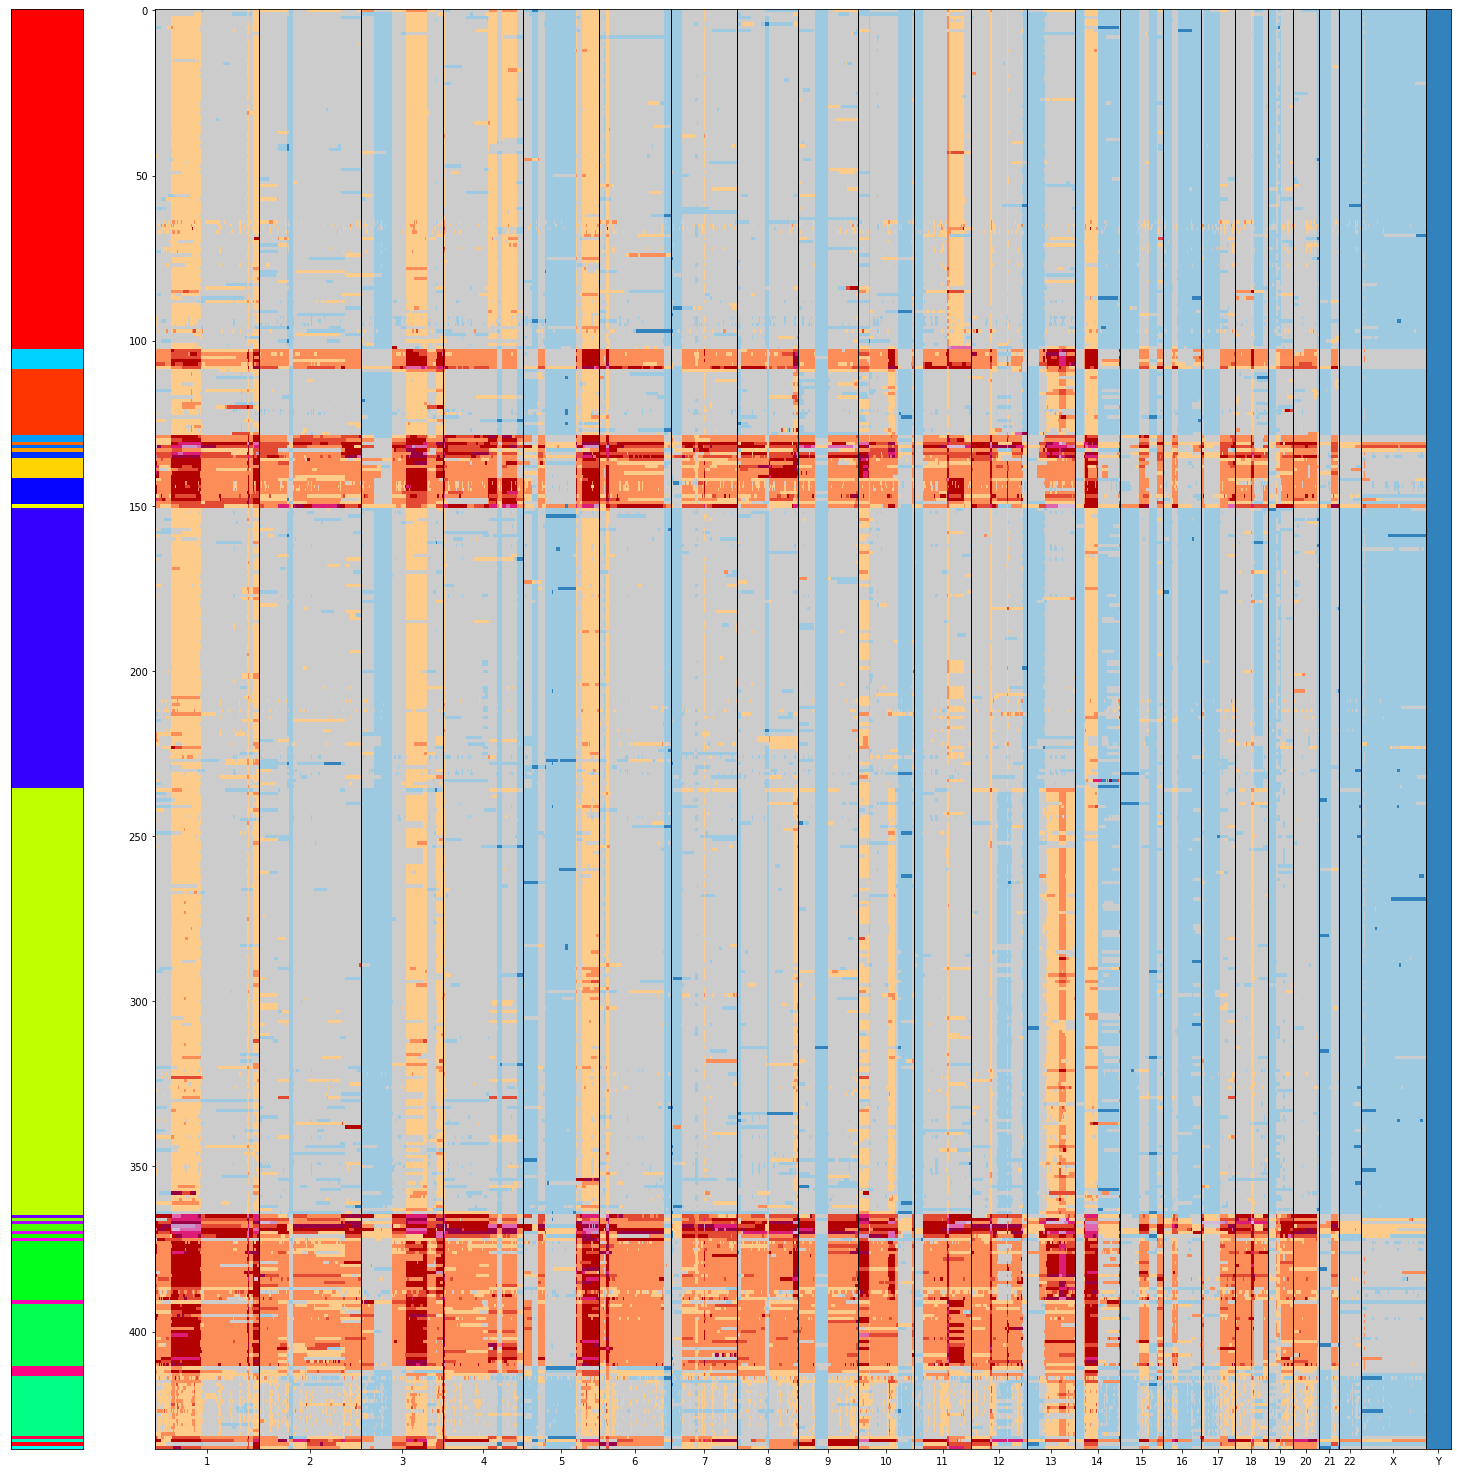

In [10]:

fig = plt.figure(figsize=(20, 20))
fig = scgenome.pl.plot_cell_cn_matrix_clusters_fig(hmmcopy, fig=fig)


<AxesSubplot:xlabel='chromosome'>

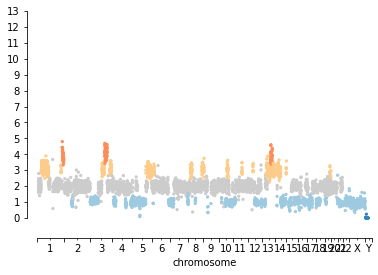

In [11]:

scgenome.pl.plot_cn_profile(
    hmmcopy, 'SA1090-A96213A-R22-C50',
    value_layer_name='copy',
    state_layer_name='state')


<AxesSubplot:xlabel='chromosome'>

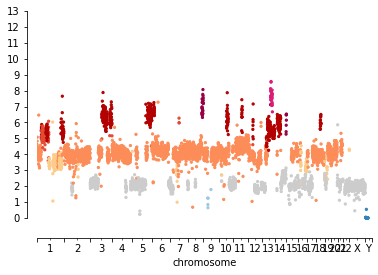

In [14]:

hmmcopy_clusters = scgenome.tl.aggregate_clusters_hmmcopy(hmmcopy)

scgenome.pl.plot_cn_profile(
    hmmcopy_clusters, '1',
    value_layer_name='copy',
    state_layer_name='state')


In [15]:

bams_filenames = {
    'SA1090-A96213A-R22-C50': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R22-C50.bam',
    'SA1090-A96213A-R20-C06': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C06.bam',
    'SA1090-A96213A-R20-C08': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C08.bam',
    'SA1090-A96213A-R20-C09': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C09.bam',
    'SA1090-A96213A-R20-C10': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C10.bam',
    'SA1090-A96213A-R20-C11': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C11.bam',
    'SA1090-A96213A-R20-C12': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C12.bam',
    'SA1090-A96213A-R20-C13': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C13.bam',
    'SA1090-A96213A-R20-C14': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C14.bam',
    'SA1090-A96213A-R22-C50': '/juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R22-C50.bam',
}


In [20]:

import scgenome.preprocessing.load_cn
import scgenome.tools.binfeat

genome_binning = scgenome.tl.create_bins(int(5e4))
adata = scgenome.pp.read_bam_bin_counts(genome_binning, bams_filenames)


2022-01-04 21:53:23,418 - INFO - reading /juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R22-C50.bam
2022-01-04 21:53:41,014 - INFO - count overlaps
2022-01-04 21:53:41,586 - INFO - reading /juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C06.bam
2022-01-04 21:53:41,657 - INFO - count overlaps
2022-01-04 21:53:41,851 - INFO - reading /juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C08.bam
2022-01-04 21:54:06,029 - INFO - count overlaps
2022-01-04 21:54:06,773 - INFO - reading /juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C09.bam
2022-01-04 21:54:26,110 - INFO - count overlaps
2022-01-04 21:54:26,711 - INFO - reading /juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C10.bam
2022-01-04 21:54:42,118 - INFO - count overlaps
2022-01-04 21:54:42,653 - INFO - reading /juno/work/shah/isabl_data_lake/analyses/85/03/8503/bams/SA1090-A96213A-R20-C11.bam
2022-01-04

<AxesSubplot:xlabel='chromosome'>

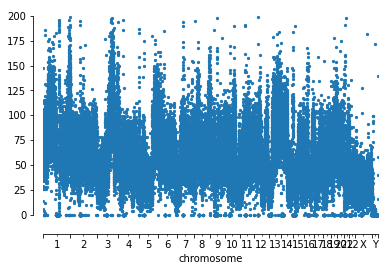

In [21]:

import scgenome.plotting.cn

adata.X[adata.X > 200] = 0

scgenome.pl.plot_cn_profile(
    adata, 'SA1090-A96213A-R22-C50',
    rawy=True)


In [23]:

genome_fasta = '/work/shah/users/mcphera1/remixt/ref_data_hg19/Homo_sapiens.GRCh37.70.dna.chromosomes.fa'

genome_binning = scgenome.tl.create_bins(int(1e4))
genome_binning = scgenome.tl.count_gc(genome_binning, genome_fasta, proportion=True)

genome_binning


,Chromosome,Start,End,gc
0,1,0,10000,0.0000
1,1,10000,20000,0.5923
2,1,20000,30000,0.5173
3,1,30000,40000,0.4711
4,1,40000,50000,0.3560
...,...,...,...,...
309574,Y,59330000,59340000,0.0000
309575,Y,59340000,59350000,0.0000
309576,Y,59350000,59360000,0.0000
309577,Y,59360000,59370000,0.0000


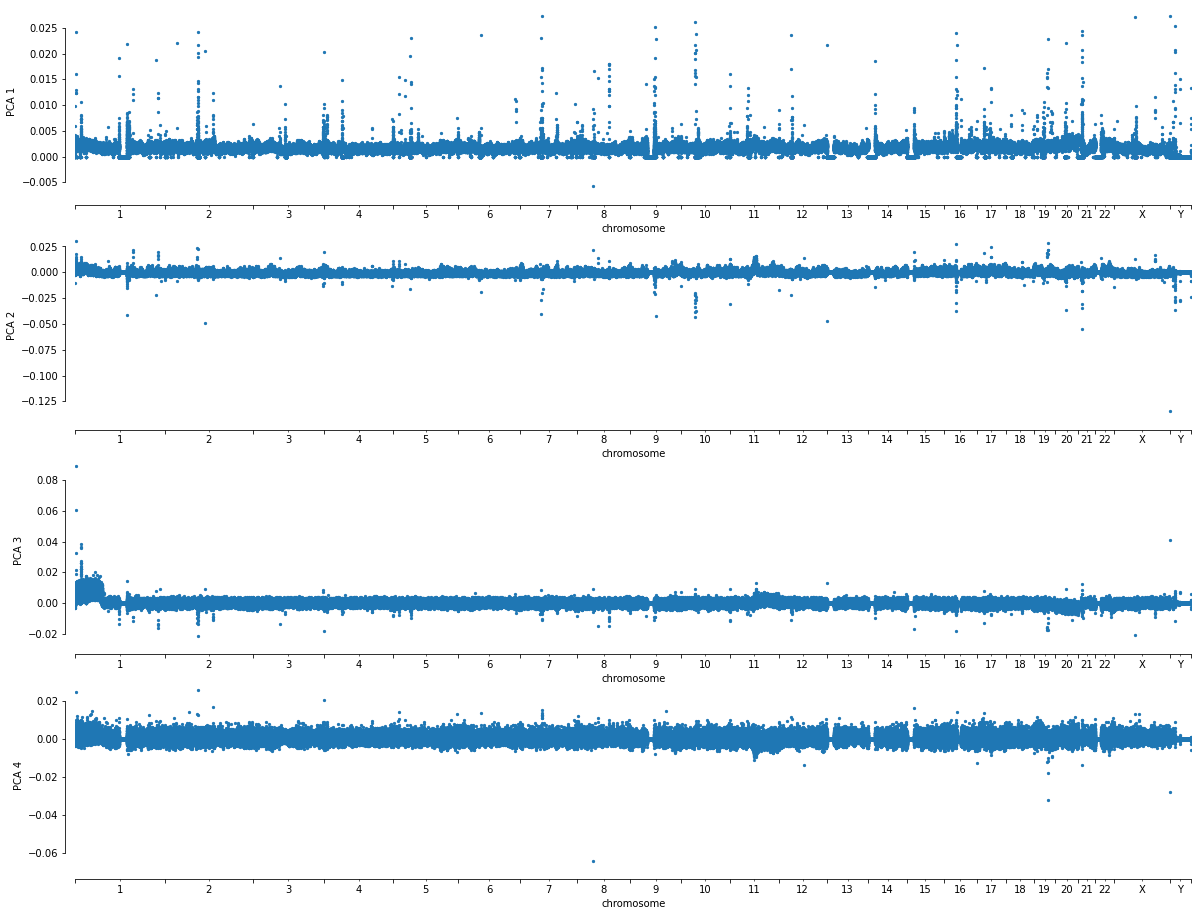

In [101]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scgenome.cnplot

x = adata.X.copy()

x[:, components.iloc[0].values > 0.005] = 0

pca = PCA()
pca.fit(x)

n_components = 5

components = pd.DataFrame(
    pca.components_,
    columns=adata.var.set_index(['chr', 'start', 'end']).index)

fig = plt.figure(figsize=(20, 4 * n_components))
for idx in range(4):
    ax = fig.add_subplot(n_components, 1, idx + 1)
    plot_data = components.iloc[idx].T.rename('component').reset_index()
    scgenome.cnplot.plot_cell_cn_profile(
        ax, plot_data, 'component', rawy=True)
    ax.set_ylabel(f'PCA {idx+1}')
